# Modelos de Regresión en Python

Este cuaderno contiene el código para la implementación de modelos de regresión en Python.

In [1]:
# Cargar modulos para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', None)

# Cargar modulos para modelo de regresión
import statsmodels.api as sm

In [295]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')

# Verificar lista de archivos en directorio de trabajo
!ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Caso 1. Gastos de Publicidad

### Enunciado de caso de regresión

Una empresa de marketing está interesada en desarrollar un modelo de regresión lineal para predecir las ventas de un producto en función del presupuesto de publicidad en televisión, radio y periódico. La empresa tiene datos de ventas para 4 regiones geográficas, por lo que el modelo también incluirá una variable de zona.

### Objetivo

Desarrollar un modelo de regresión lineal que permita a la empresa predecir las ventas de un producto en función del presupuesto de publicidad y la zona geográfica.

### Variables

- **tv:** Presupuesto de publicidad en televisión (en miles de dólares)
- **radio:** Presupuesto de publicidad en radio (en miles de dólares)
- **periodico:** Presupuesto de publicidad en periódico (en miles de dólares)
- **zona:** Región geográfica (occidente o oriente)
- **ventas:** Ventas del producto (en miles de unidades)

### Análisis

El análisis de los datos se realizará utilizando los siguientes métodos:

1. **Análisis exploratorio de datos:** Se utilizarán gráficos y tablas para explorar la relación entre las variables.
2. **Modelado de regresión lineal:** Se utilizará un modelo de regresión lineal para predecir las ventas en función de las variables de entrada.
3. **Evaluación del modelo:** Se utilizarán los indicadores $R^2$ y $R^2_{ajustado}$ para evaluar la precisión del modelo.



In [46]:
# Cargar datos
datos = pd.read_excel('datos_regresion.xlsx', sheet_name='gasto publicidad 2')
datos.head()

,tv,radio,periodico,zona,ventas
0,230.1,37.8,69.2,sur,22.1
1,44.5,39.3,45.1,norte,10.4
2,17.2,45.9,69.3,norte,9.3
3,151.5,41.3,58.5,sur,18.5
4,180.8,10.8,58.4,centro,12.9


### 1. Análisis Exploratorio de Datos

In [47]:
# Extraiga la información general de los datos


#### Análisis Univariado

In [48]:
# Resumen estadístico para variables numericas


In [49]:
# Distribución de las ventas.
# Para la distribución utilice la siguiente función: sns.histplot(data=DataFrame, x='columna')
# Adapte la función y escriba el código:


In [50]:
# Dado que las columnas tv, radio y periodico estan la misma unidad (gastos en $) comparelas e identifique datos atípicos
# Genere un gráfico de caja para comparar los tres gastos, utilice el siguiente código: datos[['radio','tv','periodico']].boxplot()


¿A todos lo medios se les destina en promedio la misma cantidad de dinero?


¿A qué medio parace destinar un mayor gasto medio? ¿Cuál puede ser la razón?


¿Hay datos atípicos? ¿Cuál puede ser la razón de estos datos atípicos?


In [51]:
# Tabla de frecuencia para zona.
# Adapte el siguiente código: DataFrame['columna'].value_counts()


In [52]:
# Gráfico de Barra
# Adapte el siguiente código: DataFrame['zona'].value_counts().plot.bar()


#### Análisis Bivariado

In [53]:
# Gráfico de dispersión gasto tv vs ventas
# Adapte el siguiente código: sns.scatterplot(data=DataFrame, x='columna_x', y='columna_y')


In [54]:
# Gráfico de dispersión gasto radio vs ventas


In [55]:
# Gráfico de dispersión gasto periodico vs ventas


In [56]:
# Calcule la correlación entre variables numéricas
# Adapte el siguiente código: DataFrame[['columna_numerica_1','columna_numerica_2','columna_numerica_3','columna_numerica_k']].corr()


In [57]:
# Ahora gráfique las matriz de correlación
# utilice el siguiente codigo: sns.heatmap(datos.corr(), annot=True)


In [58]:
# Gráfico de caja para comparar las ventas entre zonas


¿Qué variables tienen una mayor relación con las ventas?

Escriba aqui su conclusión:...

### 2. Modelo de Regresión Lineal

#### Configuración del Modelo y Ajuste

In [59]:
# En primer lugar se dividen los datos en variables independientes y variable dependiente.

# Variable dependiente
y = datos['ventas']

# Variables numéricas independientes
x = datos[['tv','radio','periodico']]

In [60]:
# Agregar la constante al modelo
x = sm.add_constant(x)
x

,const,tv,radio,periodico
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [61]:
# Crear el modelo y ajustarlo
modelo_regresion = sm.OLS(y, x).fit()

# Generar un resumen del modelo
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        08:38:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

#### Análisis de predicciones

In [62]:
# Se crea una tabla para guardar las ventas reales y las predicciones
prediccion = pd.DataFrame()

# Se crea una nueva columna para guardar las ventas
prediccion['ventas'] = y

# Ahora se crea una nueva columna para guardar las predicciones
prediccion['ventas estimadas'] = modelo_regresion.predict()

# Se calcula el error
prediccion['error'] = prediccion['ventas'] - prediccion['ventas estimadas']
prediccion

,ventas,ventas estimadas,error
0,22.1,20.523974,1.576026
1,10.4,12.337855,-1.937855
2,9.3,12.307671,-3.007671
3,18.5,17.597830,0.902170
4,12.9,13.188672,-0.288672
...,...,...,...
195,7.6,5.370342,2.229658
196,9.7,8.165312,1.534688
197,12.8,12.785921,0.014079
198,25.5,23.767321,1.732679


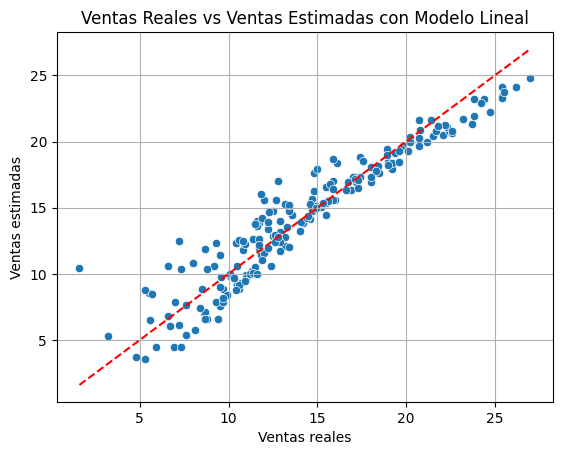

In [63]:
# Crea la gráfica de dispersión
sns.scatterplot(data=prediccion, x='ventas', y='ventas estimadas')

# Crear la linea de predicción perfectas
plt.plot([prediccion["ventas"].min(), prediccion["ventas"].max()], 
         [prediccion["ventas"].min(), prediccion["ventas"].max()], 
         color="red", linestyle="dashed")
plt.title('Ventas Reales vs Ventas Estimadas con Modelo Lineal')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas estimadas')
plt.grid(True)
plt.show()

In [64]:
# Calcular el MSE
mse = np.mean(prediccion['error']**2)
mse

2.784126314510936

In [65]:
# Calcular el RMSE
rmse = np.sqrt(mse)
rmse

1.6685701407225697

**En promedio las predicciones se desvian en 1.67 (1670 unidades)**

In [66]:
# Calcular el MAPE
mape = np.mean(np.abs(prediccion['error']/prediccion['ventas']))
mape

0.13877847090457157

**En promedio las predicciones se desvian un 13.88% con respecto al valor real.**

### Análisis de residuales

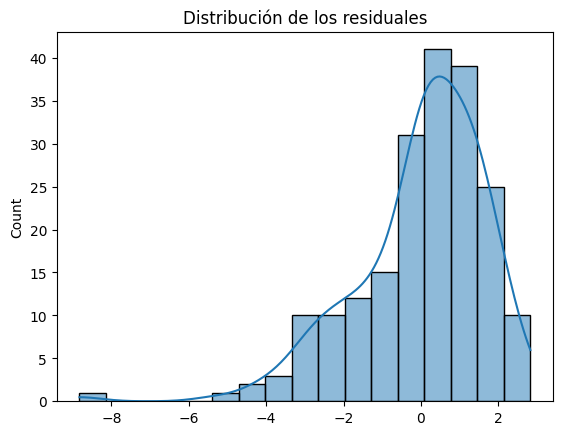

In [67]:
# Normalidad
sns.histplot(x=modelo_regresion.resid, kde=True)
plt.title("Distribución de los residuales")
plt.show()

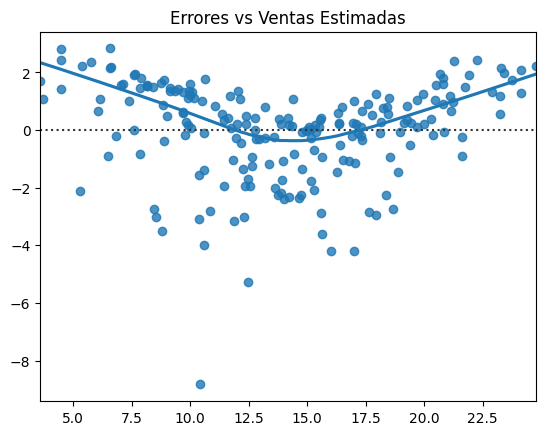

In [68]:
# Varianza constante (Homocedasticidad)
sns.residplot(x=modelo_regresion.predict(), y=modelo_regresion.resid, lowess=True)
plt.title("Errores vs Ventas Estimadas")
plt.show()

#### Interacción entre el gasto de tv y radio



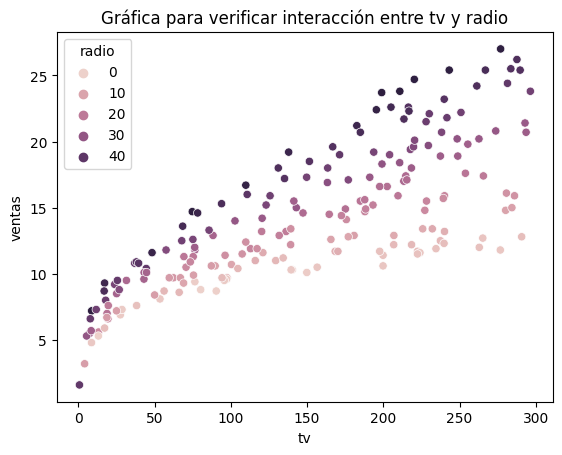

In [69]:
# Gráfica de interacción tv y radio
sns.scatterplot(data=datos, x='tv', y='ventas', hue='radio')
plt.title("Gráfica para verificar interacción entre tv y radio")
plt.show()

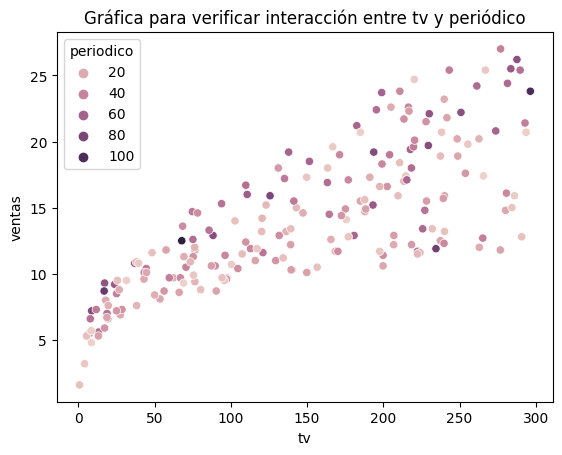

In [70]:
# Gráfica de interacción tv y radio
sns.scatterplot(data=datos, x='tv', y='ventas', hue='periodico')
plt.title("Gráfica para verificar interacción entre tv y periódico")
plt.show()

#### Comportamiento No Lineal de la relación entre las ventas y tv

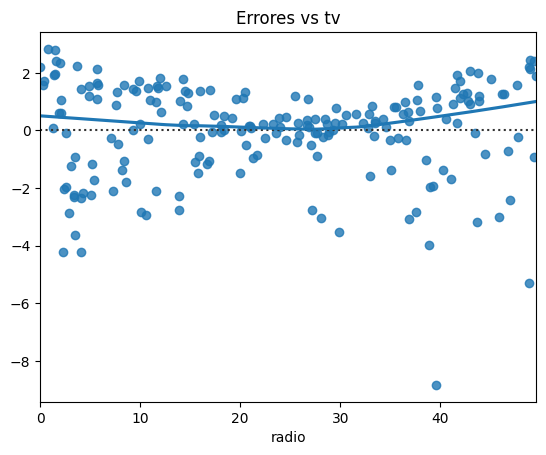

In [71]:
# Varianza constante (Homocedasticidad)
sns.residplot(x=datos['radio'], y=modelo_regresion.resid, lowess=True)
plt.title("Errores vs tv")
plt.show()

In [72]:
# Agregar la variable de interacción de tv y
datos['int-tv-radio'] = datos['tv']*datos['radio']
datos['tv2'] = datos['tv']**2

In [73]:
# Seleccione la variable dependiente
x = datos[['tv','radio','periodico','zona','int-tv-radio','tv2']]

# Crear las dummies
x = pd.get_dummies(x, drop_first=True)

# Seleccione las variables independientes: tv, radio, periodico, zona, int-tv-radio y tv2
y = datos['ventas']

In [74]:
# Agregar la constante al modelo
x = sm.add_constant(x)
x

,const,tv,radio,periodico,int-tv-radio,tv2,zona_norte,zona_sur
0,1.0,230.1,37.8,69.2,8697.78,52946.01,0,1
1,1.0,44.5,39.3,45.1,1748.85,1980.25,1,0
2,1.0,17.2,45.9,69.3,789.48,295.84,1,0
3,1.0,151.5,41.3,58.5,6256.95,22952.25,0,1
4,1.0,180.8,10.8,58.4,1952.64,32688.64,0,0
...,...,...,...,...,...,...,...,...
195,1.0,38.2,3.7,13.8,141.34,1459.24,1,0
196,1.0,94.2,4.9,8.1,461.58,8873.64,0,0
197,1.0,177.0,9.3,6.4,1646.10,31329.00,0,0
198,1.0,283.6,42.0,66.2,11911.20,80428.96,0,0


In [75]:
# Crear el modelo y ajustarlo
modelo2 = sm.OLS(y, x).fit()

# Generar un resumen del modelo. LLamelo modelo_regresion_no_lineal
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1983.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.48e-175
Time:                        08:38:28   Log-Likelihood:                -184.25
No. Observations:                 200   AIC:                             384.5
Df Residuals:                     192   BIC:                             410.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0551      0.205     24.606   

#### Análisis de predicciones

In [76]:
# Se crea una tabla para guardar las ventas reales y las predicciones
prediccion = pd.DataFrame()

# Se crea una nueva columna para guardar las ventas
prediccion['ventas'] = y

# Ahora se crea una nueva columna para guardar las predicciones
prediccion['ventas estimadas'] = modelo2.predict()

# Se calcula el error
prediccion['error'] = prediccion['ventas'] - prediccion['ventas estimadas']
prediccion

,ventas,ventas estimadas,error
0,22.1,21.788532,0.311468
1,10.4,10.585868,-0.185868
2,9.3,8.654037,0.645963
3,18.5,18.530303,-0.030303
4,12.9,13.329930,-0.429930
...,...,...,...
195,7.6,7.298934,0.301066
196,9.7,9.556855,0.143145
197,12.8,12.715346,0.084654
198,25.5,25.118537,0.381463


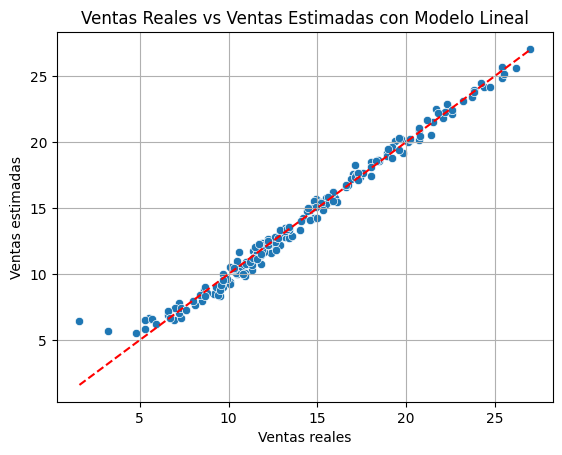

In [77]:
# Crea la gráfica de dispersión
sns.scatterplot(data=prediccion, x='ventas', y='ventas estimadas')

# Crear la linea de predicción perfectas
plt.plot([prediccion["ventas"].min(), prediccion["ventas"].max()], 
         [prediccion["ventas"].min(), prediccion["ventas"].max()], 
         color="red", linestyle="dashed")
plt.title('Ventas Reales vs Ventas Estimadas con Modelo Lineal')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas estimadas')
plt.grid(True)
plt.show()

In [78]:
# Calcular el MSE
mse = np.mean(prediccion['error']**2)
mse

0.3695712805782259

In [79]:
# Calcular el RMSE
rmse = np.sqrt(mse)
rmse

0.6079237456936732

**En promedio las predicciones se desvian en 0.607 (607 unidades)**

In [80]:
# Calcular el MAPE
mape = np.mean(np.abs(prediccion['error']/prediccion['ventas']))
mape

0.05232299325342034

**En promedio las predicciones se desvian un 5.23% con respecto al valor real.**

### Análisis de residuales

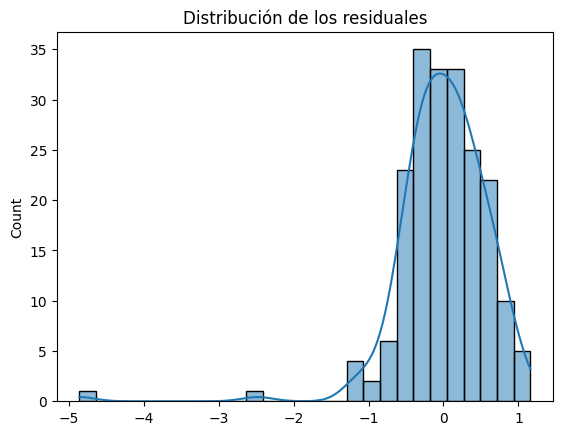

In [81]:
# Normalidad
sns.histplot(x=modelo2.resid, kde=True)
plt.title("Distribución de los residuales")
plt.show()

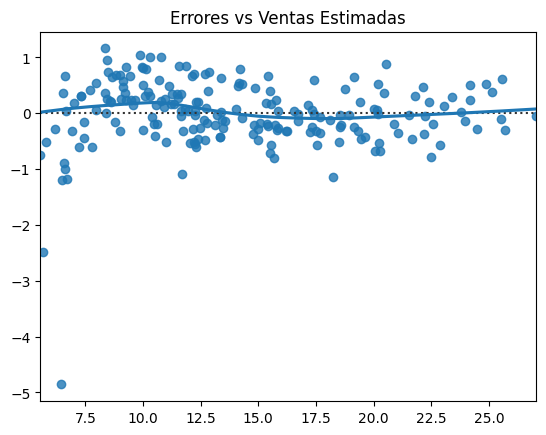

In [82]:
# Varianza constante (Homocedasticidad)
sns.residplot(x=modelo2.predict(), y=modelo2.resid, lowess=True)
plt.title("Errores vs Ventas Estimadas")
plt.show()

# Caso 2. 

Los datos de una encuesta de satisfacción de clientes de una aerolinea son suministrados en el archivo de excel. Para los clientes entrevistados se registro el sexo, la edad, el estatus del cliente (básico, oro, platino), el número de viajes realizados con la aerolinea en los últimos doce meses (los valores más altos indican mayor gravedad), y el pago promedio de los tiquetes comprados en los últimos doce meses. La satisfacción se mide en una escala de 0-100, los valores altos indican una mayor satisfacción. 

Los datos estan almacenados en el archivo de Excel en la hoja *survey_aerolinea*. Desarrolle un modelo de regresión múltiple que permita explicar la satisfacción del cliente y responda las siguientes preguntas:

1. ¿Es significativa la regresión? Justifique su respuesta.
2. ¿Cual es el 𝑅^2 y qué significa esto para le modelo?
3. ¿Qué variables parecen estar correlacionadas?
4. ¿Cuales son las variables son significativas?
5. ¿Que variables aportan negativa y positivamente a la satisfacción del cliente?
6. Escriba la ecuación del modelo.
7. Haga un análisis de las predicciones 
8. Haga un análisis de residuales. ¿Es necesarios agregar componentes de interacción o cuadraticos? De ser así plantee un nuevo modelo con estos terminos y realice el análisis de la regresión, las predicciones y los residuales.


In [83]:
# Cargar datos
datos2 = pd.read_excel('datos_regresion.xlsx', sheet_name='survey aerolinea')
datos2.head()

,Sexo,Edad,Estatus,Cant_Viajes,Precio_Promedio,Satisfaccion
0,F,55,Oro,14,110,68
1,M,46,Platino,16,84,77
2,M,30,Platino,27,106,96
3,F,35,Oro,22,108,80
4,F,59,Oro,18,118,43
